C:\Users\Usuario\AppData\Local\Temp\ipykernel_20236\4264811030.py:9: DtypeWarning: Columns (1,3,5,40,42,43,44,45,46,47,48,49,51,52,53,54,56,57,58,59,60,71,77,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


Tipos de eventos disponibles:
type
Pass                 27873
Ball Receipt*        25175
Carry                21631
Pressure              9172
Ball Recovery         2973
Duel                  2179
Block                 1248
Clearance             1193
Goal Keeper            978
Foul Committed         974
Dribble                942
Foul Won               922
Miscontrol             824
Shot                   790
Dispossessed           766
Interception           544
Dribbled Past          503
Substitution           306
Injury Stoppage        257
50/50                  241
Half Start             140
Half End               140
Referee Ball-Drop      138
Tactical Shift         124
Starting XI             64
Shield                  56
Player Off              44
Player On               44
Bad Behaviour           26
Error                   22
Offside                 14
Own Goal For             1
Own Goal Against         1
Name: count, dtype: int64

Métricas por equipo:


type,50/50,Bad Behaviour,Ball Receipt*,Ball Recovery,Block,Carry,Clearance,Dispossessed,Dribble,Dribbled Past,...,Pass,Player Off,Player On,Pressure,Referee Ball-Drop,Shield,Shot,Starting XI,Substitution,Tactical Shift
team,,,,,,,,,,,,,,,,,,,,,
Argentina,18,1,3197,210,117,2740,81,60,88,61,...,3358,5,5,802,24,4,88,6,30,12
Bolivia,13,1,1155,141,68,946,67,50,37,29,...,1224,0,0,492,2,0,17,3,15,8
Brazil,19,3,1969,176,69,1755,66,40,97,30,...,2120,1,1,548,5,3,55,4,18,8
Canada,23,4,2197,289,126,1906,133,82,94,39,...,2472,6,6,968,15,5,74,6,27,8
Chile,12,1,1189,136,62,1045,51,43,42,24,...,1317,4,4,463,10,1,22,3,13,5
Colombia,32,6,2657,269,108,2251,86,79,87,44,...,2952,5,5,832,13,7,79,6,31,7
Costa Rica,14,1,780,148,68,674,72,38,42,30,...,901,2,2,520,7,2,9,3,15,6
Ecuador,15,1,1095,202,83,1010,109,45,62,25,...,1323,5,5,524,14,7,54,4,17,8
Jamaica,10,0,964,156,78,857,71,36,38,18,...,1144,2,2,331,3,2,28,3,14,9


<Figure size 1200x600 with 0 Axes>

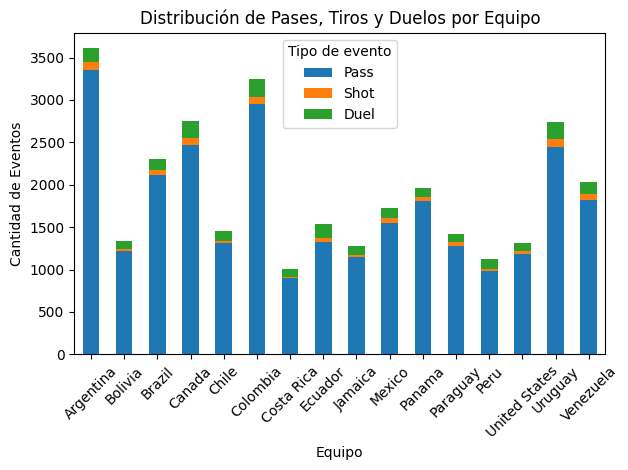


Top 10 jugadores con más pases:
player
Cristian Gabriel Romero               352
Davinson Sánchez Mina                 345
Johan Andrés Mojica Palacio           327
Lisandro Martínez                     326
Federico Santiago Valverde Dipetta    308
James David Rodríguez Rubio           305
Marcos Aoás Corrêa                    290
Alistair Johnston                     288
Rodrigo Javier De Paul                288
Stephen Antunes Eustáquio             281
Name: count, dtype: int64


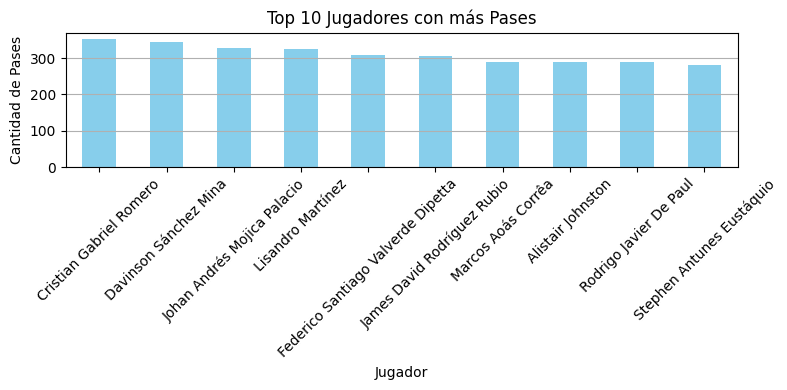


✅ Archivo 'metricas_por_equipo.csv' exportado correctamente.


In [1]:
# 02_eda_y_metricas_equipo.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset consolidado de eventos
ruta = "C:/Users/Usuario/OneDrive/Documentos/Cursos/Sport Data Campus/Master en Python Avanzado al deporte/Modulo 11/Proyecto Final/Data/eventos_copa_america/eventos_copa_america_2024.csv"
df = pd.read_csv(ruta)

# Verificar los tipos de eventos disponibles
print("Tipos de eventos disponibles:")
print(df['type'].value_counts())

# -----------------------------
# Métricas generales por equipo
# -----------------------------
print("\nMétricas por equipo:")
metricas_equipo = df.groupby('team')['type'].value_counts().unstack().fillna(0)
metricas_equipo = metricas_equipo.astype(int).sort_index(axis=1)

# Mostrar las métricas
display(metricas_equipo)

# -----------------------------
# Gráfico comparativo de eventos por equipo
# -----------------------------
plt.figure(figsize=(12, 6))
metricas_equipo[['Pass', 'Shot', 'Duel']].plot(kind='bar', stacked=True)
plt.title('Distribución de Pases, Tiros y Duelos por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de evento')
plt.tight_layout()
plt.show()

# -----------------------------
# Métricas por jugador (top 10 pases)
# -----------------------------
print("\nTop 10 jugadores con más pases:")
pases_por_jugador = df[df['type'] == 'Pass']['player'].value_counts().head(10)
print(pases_por_jugador)

plt.figure(figsize=(8, 4))
pases_por_jugador.plot(kind='bar', color='skyblue')
plt.title('Top 10 Jugadores con más Pases')
plt.xlabel('Jugador')
plt.ylabel('Cantidad de Pases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -----------------------------
# Exportar métricas por equipo a CSV
# -----------------------------
metricas_equipo.to_csv("../data/eventos_copa_america/metricas_por_equipo.csv")
print("\n✅ Archivo 'metricas_por_equipo.csv' exportado correctamente.")
